In [13]:
#Dependencies and setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from pathlib import Path

In [14]:
csv_file = Path("Resources/PB_support_freedom.csv")
social_freedom_df = pd.read_csv(csv_file)
social_freedom_df.head()

,Country,continent,happiness_score,family,freedom,Life expectancy
0,Afghanistan,Asia,3.794,0.581543,0.106180,65.0
1,Albania,Europe,4.644,0.803685,0.381499,77.8
2,Algeria,Africa,5.872,1.146217,0.233336,75.6
3,Argentina,South America,6.599,1.440451,0.494519,76.3
4,Armenia,Asia,4.376,1.007484,0.198303,74.8


In [15]:
top_happy = social_freedom_df.sort_values("happiness_score", ascending=False)
top_happy = top_happy.assign(row_number=range(len(top_happy)))
top_happy = top_happy.rename(columns={"row_number": "Happiness Ranking"})
top_happy.head(10)

,Country,continent,happiness_score,family,freedom,Life expectancy,Happiness Ranking
86,Norway,Europe,7.537,1.533524,0.635423,81.8,0
29,Denmark,Europe,7.522,1.551122,0.626007,86.0,1
48,Iceland,Europe,7.504,1.610574,0.627163,82.7,2
107,Switzerland,Europe,7.494,1.516912,0.620071,83.4,3
36,Finland,Europe,7.469,1.540247,0.617951,81.1,4
81,Netherlands,Europe,7.377,1.428939,0.585384,81.9,5
21,Canada,North America,7.316,1.481349,0.611101,82.2,6
82,New Zealand,Australia,7.314,1.548195,0.614062,81.6,7
5,Australia,Australia,7.284,1.510042,0.601607,82.8,8
106,Sweden,Europe,7.284,1.478162,0.612924,82.4,9


In [16]:
bottom_happy = top_happy.sort_values("happiness_score", ascending=True)
bottom_happy.head(10)

,Country,continent,happiness_score,family,freedom,Life expectancy,Happiness Ranking
18,Burundi,Africa,2.905,0.629794,0.059901,59.6,121
95,Rwanda,Africa,3.471,0.945707,0.581844,66.1,120
110,Togo,Africa,3.495,0.431883,0.380426,59.9,119
44,Guinea,South America,3.507,0.791245,0.348588,59.0,118
64,Liberia,Africa,3.533,0.872118,0.332881,61.4,117
119,Yemen,Asia,3.593,0.935382,0.249464,65.7,116
45,Haiti,South America,3.603,0.640450,0.030370,63.5,115
68,Madagascar,Africa,3.644,0.913020,0.189197,65.5,114
12,Benin,Africa,3.657,0.435300,0.425963,60.0,113
14,Botswana,Africa,3.766,1.221555,0.505196,65.7,112


In [17]:
top_life = top_happy.sort_values("Life expectancy ", ascending=False)
top_life = top_life.assign(row_number=range(len(top_life)))
top_life = top_life.rename(columns={"row_number": "Life Expectancy Ranking"})
top_life.head(10)

,Country,continent,happiness_score,family,freedom,Life expectancy,Happiness Ranking,Life Expectancy Ranking
102,Slovenia,Europe,5.758,1.452519,0.572576,88.0,49,0
29,Denmark,Europe,7.522,1.551122,0.626007,86.0,1,1
28,Cyprus,Asia,5.621,1.131363,0.355112,85.0,52,2
23,Chile,South America,6.652,1.284025,0.376895,85.0,17,3
56,Japan,Asia,5.920,1.436338,0.505626,83.7,42,4
107,Switzerland,Europe,7.494,1.516912,0.620071,83.4,3,5
100,Singapore,Asia,6.572,1.353814,0.549841,83.1,22,6
104,Spain,Europe,6.403,1.532091,0.408781,82.8,29,7
5,Australia,Australia,7.284,1.510042,0.601607,82.8,8,8
54,Italy,Europe,5.964,1.444923,0.256451,82.7,41,9


In [18]:
bottom_life = top_life.sort_values("Life expectancy ", ascending=True)
bottom_life.head(10)

,Country,continent,happiness_score,family,freedom,Life expectancy,Happiness Ranking,Life Expectancy Ranking
99,Sierra Leone,Africa,4.709,0.984136,0.318698,51.0,85,121
22,Chad,Africa,3.936,0.953856,0.162342,53.1,109,120
85,Nigeria,Africa,5.074,1.215770,0.394953,54.5,76,119
20,Cameroon,Africa,4.695,0.946018,0.430389,57.3,86,118
71,Mali,Africa,4.190,1.281473,0.306614,58.2,101,117
69,Malawi,Africa,3.970,0.512569,0.466915,58.3,108,116
44,Guinea,South America,3.507,0.791245,0.348588,59.0,118,115
18,Burundi,Africa,2.905,0.629794,0.059901,59.6,121,114
110,Togo,Africa,3.495,0.431883,0.380426,59.9,119,113
17,Burkina Faso,Africa,4.032,1.043280,0.324368,59.9,106,112


In [19]:
all_ranked = top_life.copy()
all_ranked["Variance (Happiness-Life)"] = (all_ranked["Happiness Ranking"] - all_ranked["Life Expectancy Ranking"])
all_ranked = all_ranked.sort_index()
all_ranked

,Country,continent,happiness_score,family,freedom,Life expectancy,Happiness Ranking,Life Expectancy Ranking,Variance (Happiness-Life)
0,Afghanistan,Asia,3.794,0.581543,0.106180,65.0,111,100,11
1,Albania,Europe,4.644,0.803685,0.381499,77.8,87,30,57
2,Algeria,Africa,5.872,1.146217,0.233336,75.6,44,47,-3
3,Argentina,South America,6.599,1.440451,0.494519,76.3,20,40,-20
4,Armenia,Asia,4.376,1.007484,0.198303,74.8,97,57,40
...,...,...,...,...,...,...,...,...,...
117,Uruguay,South America,6.454,1.412228,0.579392,77.0,25,36,-11
118,Uzbekistan,Asia,5.971,1.548969,0.658249,69.4,40,82,-42
119,Yemen,Asia,3.593,0.935382,0.249464,65.7,116,98,18
120,Zambia,Africa,4.514,1.003187,0.461603,61.8,92,109,-17


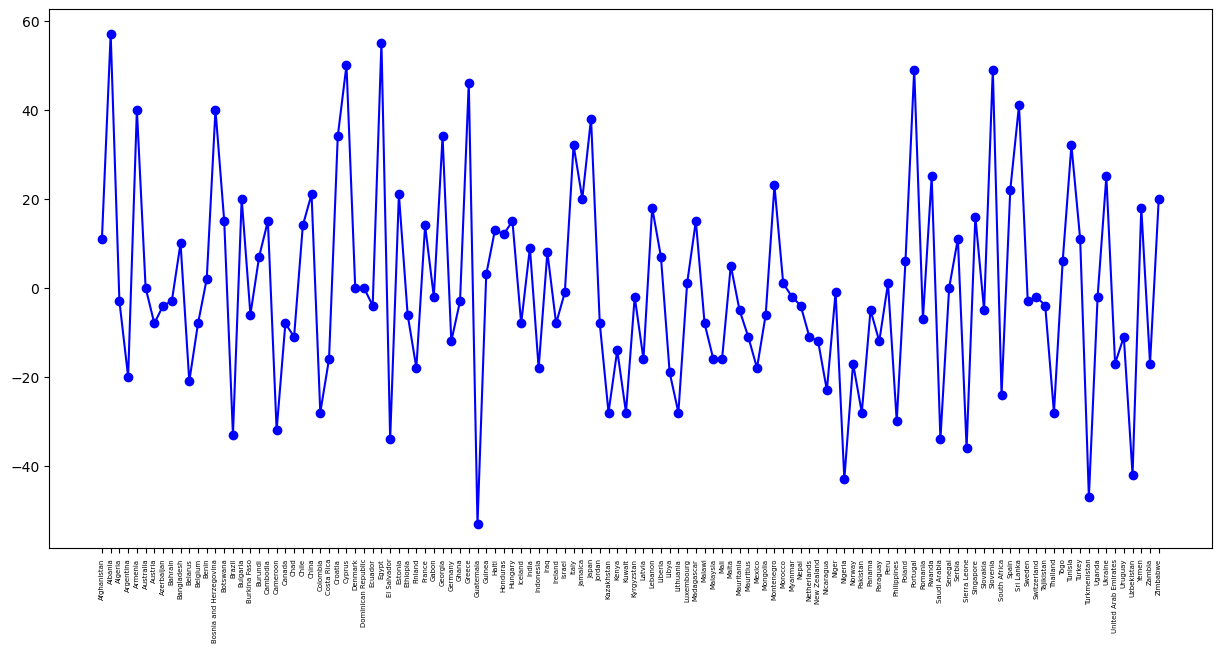

In [20]:
x_axis = all_ranked["Country"]
y_happy = all_ranked["Happiness Ranking"]
y_life = all_ranked["Life Expectancy Ranking"]
y_variance = all_ranked["Variance (Happiness-Life)"]

#happy, = plt.plot(x_axis, y_happy, marker="o", color="orange", label="Happiness Ranking")
#life, = plt.plot(x_axis, y_life, marker="x", color="green", label="Life Expectancy Ranking")

#variance = plt.plot(x_axis, y_variance, marker="o", color="blue", label="Variance")

#plt.xticks(size=5, rotation=90)

#plt.show()

size = plt.figure()
size.set_figwidth(15)
size.set_figheight(7)

variance = plt.plot(x_axis, y_variance, marker="o", color="blue", label="Variance")
plt.xticks(size=5,rotation=90)

#plt.show()

plt.savefig("output_data/variance.png")
plt.show()

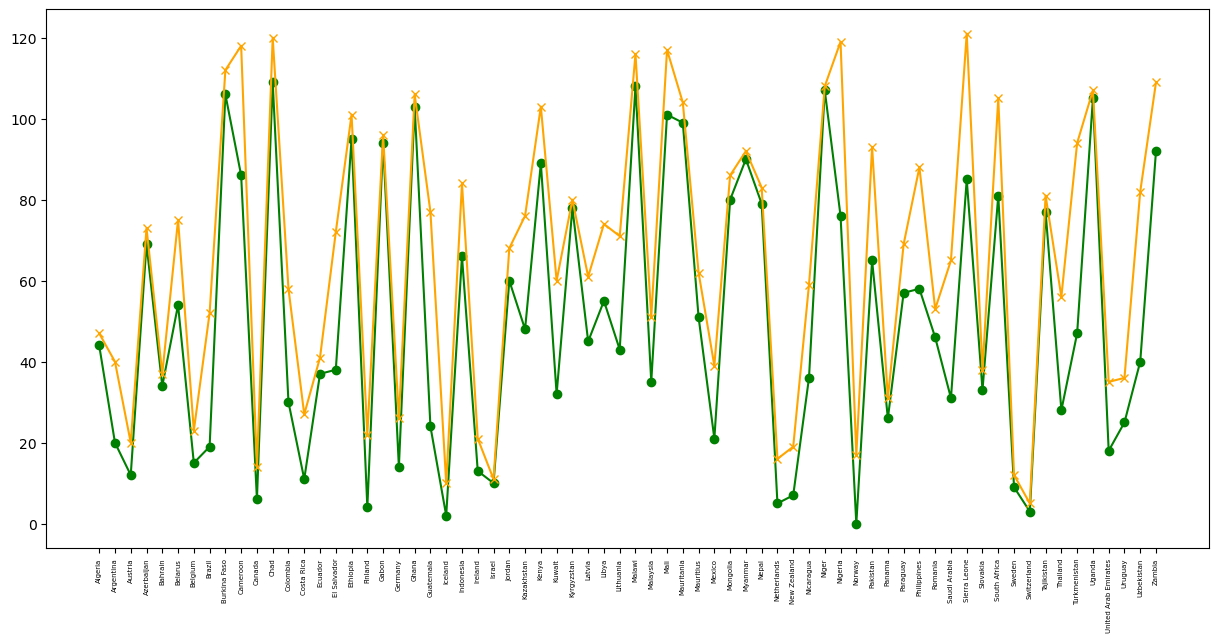

In [21]:
#countries that have lost rank on life (eg higher happiness ranking)
lower_rankings = all_ranked.loc[all_ranked["Variance (Happiness-Life)"] < 0]

x_lower = lower_rankings["Country"]
y_happy = lower_rankings["Happiness Ranking"]
y_life = lower_rankings['Life Expectancy Ranking']

size = plt.figure()
size.set_figwidth(15)
size.set_figheight(7)

happy = plt.plot(x_lower, y_happy, marker="o", color="green", label="Happy")
life = plt.plot(x_lower, y_life, marker="x", color="orange", label="Life")
plt.xticks(size=5,rotation=90)

plt.show()

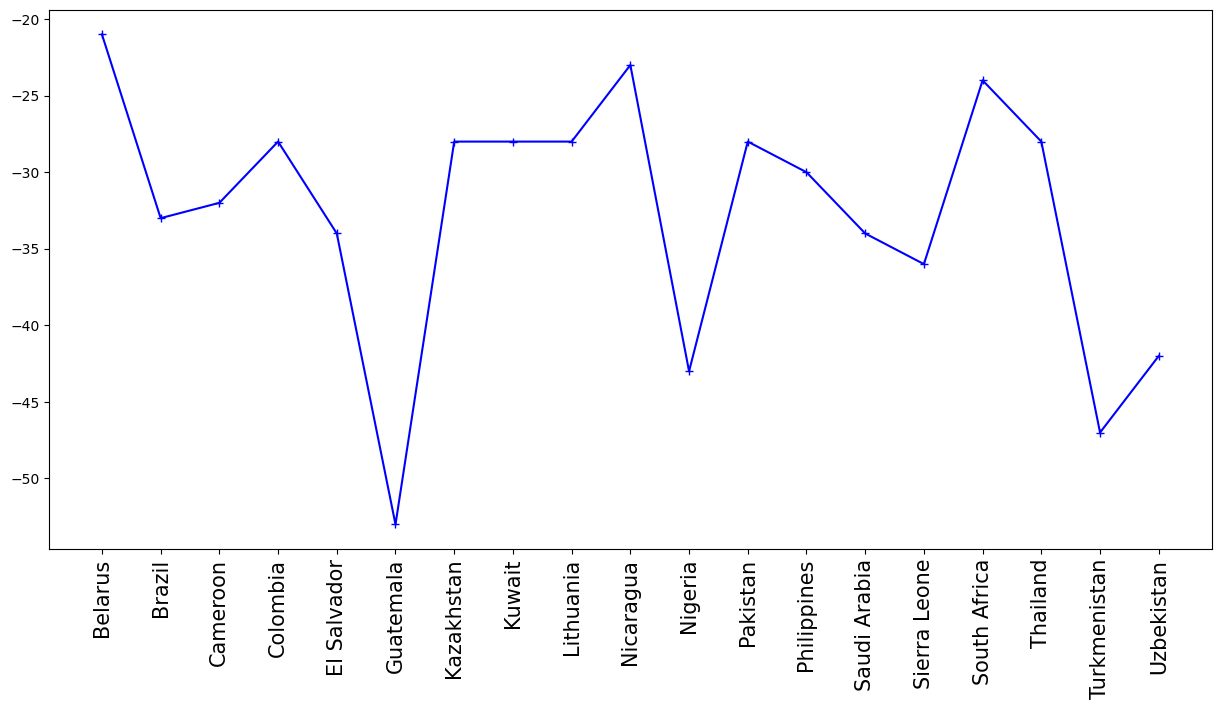

In [22]:
#countries that have lost rank on life (eg higher happiness ranking) by more than 20 points
lower_rankings_large = lower_rankings.loc[lower_rankings["Variance (Happiness-Life)"] < -20]

x_lower_large = lower_rankings_large["Country"]
y_happy = lower_rankings_large["Happiness Ranking"]
y_life = lower_rankings_large['Life Expectancy Ranking']
y_variance = lower_rankings_large["Variance (Happiness-Life)"]

size = plt.figure()
size.set_figwidth(15)
size.set_figheight(7)

#happy = plt.plot(x_lower_large, y_happy, marker="o", color="green", label="Happy")
#life = plt.plot(x_lower_large, y_life, marker="x", color="orange", label="Life")
y_variance = plt.plot(x_lower_large, y_variance, marker="+", color="blue", label="Variance")

plt.xticks(size=15,rotation=90)

#plt.grid()
plt.show()

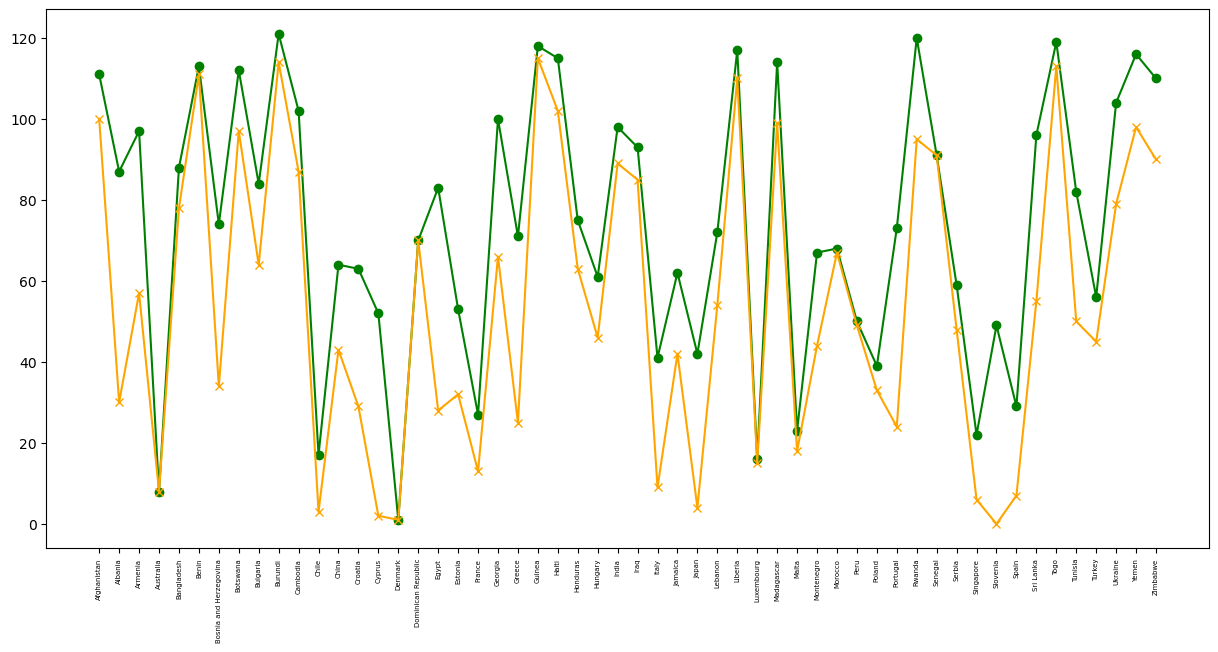

In [23]:
#countries that have gained rank on life (eg higher life expectancy ranking)
higher_rankings = all_ranked.loc[all_ranked["Variance (Happiness-Life)"] >= 0]

x_higher = higher_rankings["Country"]
y_happy = higher_rankings["Happiness Ranking"]
y_life = higher_rankings['Life Expectancy Ranking']

size = plt.figure()
size.set_figwidth(15)
size.set_figheight(7)

happy = plt.plot(x_higher, y_happy, marker="o", color="green", label="Happy")
life = plt.plot(x_higher, y_life, marker="x", color="orange", label="Life")
plt.xticks(size=5,rotation=90)

plt.show()

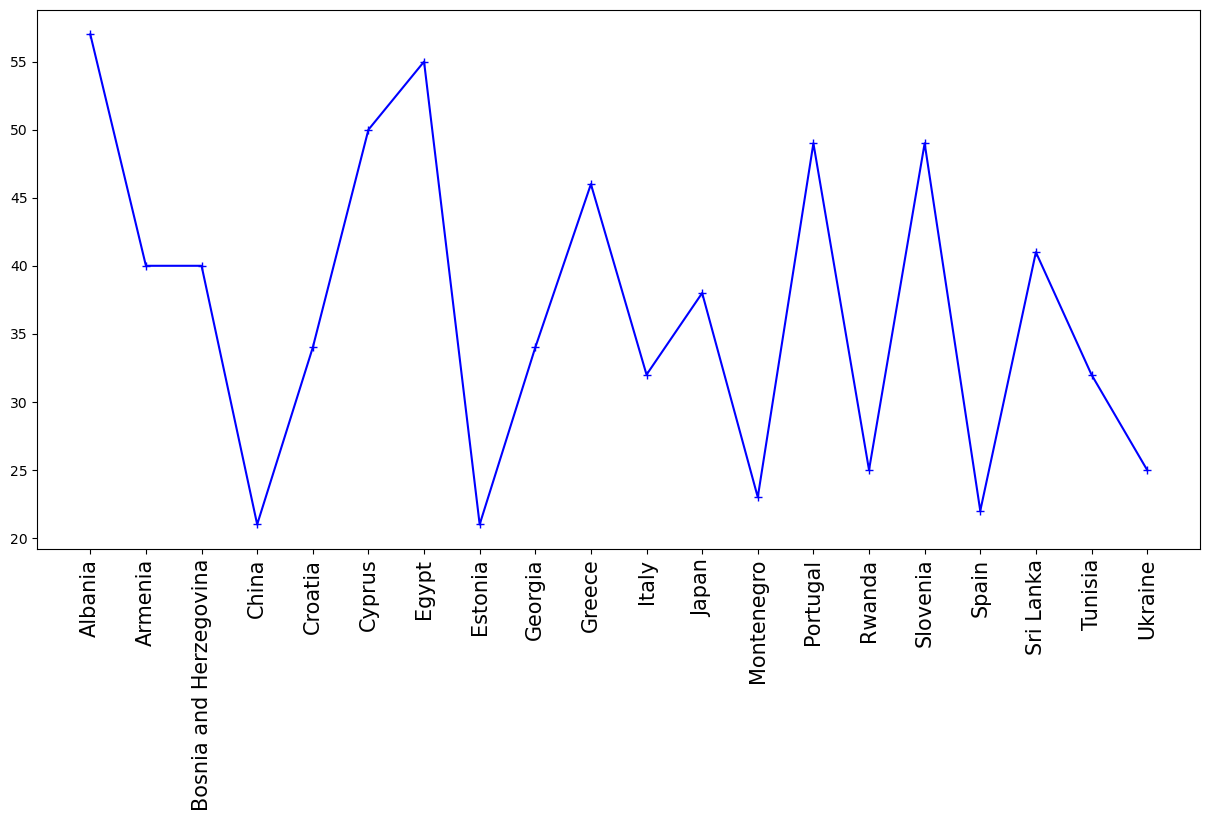

In [24]:
#countries that have gained rank on life (eg higher life expectancy ranking) by more than 20 points
higher_rankings_large = higher_rankings.loc[higher_rankings["Variance (Happiness-Life)"] > 20]

x_higher_large = higher_rankings_large["Country"]
y_happy = higher_rankings_large["Happiness Ranking"]
y_life = higher_rankings_large['Life Expectancy Ranking']
y_variance = higher_rankings_large["Variance (Happiness-Life)"]

size = plt.figure()
size.set_figwidth(15)
size.set_figheight(7)

#happy = plt.plot(x_higher_large, y_happy, marker="o", color="green", label="Happy")
#life = plt.plot(x_higher_large, y_life, marker="x", color="orange", label="Life")
variance = plt.plot(x_higher_large, y_variance, marker="+", color="blue", label="Variance")

plt.xticks(size=15,rotation=90)

#plt.grid()
plt.show()